In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lagrange cardinal CardinalPolynomial
def CardinalPolynomial(x, i, t):
    """Lagrange cardinal polynomial
    x: list of nodes(knots)
    i: index of the node
    t: points to evaluate the polynomial as list
    """
    l = lambda k: np.prod([(k - x[j]) / (x[i] - x[j]) for j in range(len(x)) if j != i])
    return np.array([l(k) for k in t])

def InterpolerLagrangeForm(x, y, t):
    """ Calculates the values of the interpolating polynomial in Lagrange form
    args:
        x: list of nodes(knots)
        y: list of y-values
        t: points to evaluate the polynomial as list
        
    Returns:
        list: [P(t1) ... P(tm)]  a row with the m function values of the interpolating polynomial
    """
    cardinals = CardinalPolynomial(x,0,t)
    for i in range(1,len(x)):
        cardinals = np.vstack((cardinals,CardinalPolynomial(x,i,t)))

    cardinals = cardinals.T
    P_val = np.zeros(len(t))
    for idx in range(len(t)):
        P_val[idx] = np.sum(np.multiply(cardinals[idx],y))
    return P_val


## 9.1 Invers Kvadratisk Interpolation

In [4]:
f = lambda x: np.sin(x)*np.exp(10*x)

In [16]:
def MinInversKvadratiskInterpolation(f,xGuess,n):
    output = []
    for _ in range(n):
        x = list(map(f,xGuess))
        x3 = InterpolerLagrangeForm(x,xGuess,[0])
        xGuess = [xGuess[1],xGuess[2],x3[0]]
        output.append(x3[0])
    return output 


In [17]:
estimates = np.array(MinInversKvadratiskInterpolation(f,[0.3,0.2,0.1],7))
print(estimates)

[7.30178851e-02 3.45518058e-02 1.12778675e-02 1.96514823e-03
 8.13862485e-05 2.44650919e-07 5.78299328e-12]


In [41]:
e = np.abs(estimates[2:])

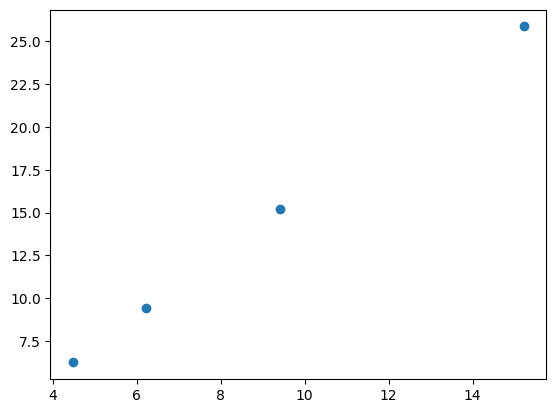

In [42]:
plt.plot(np.abs(np.log(e[:-1])),np.abs(np.log(e[1:])),'o');

In [43]:
x = e[:-1]
y = np.log(e[1:])

def Ftest(x):
    return [1,np.log(x)]
def Fctest(x,c):
    return c[0]+c[1]*(np.log(x))

A = np.array(list(map(Ftest,x)))
c = np.linalg.solve(A.T@A, A.T@y)
print(c)

[1.98443269 1.82951188]


In [45]:
estimates = np.array(MinInversKvadratiskInterpolation(f,[0.3,0.2,-0.1],20))
print(estimates)

[-0.0910799   2.10911055  2.163979   -0.0910799  -0.0910799   0.9626646
  0.96266162 -0.09107398 -0.09106806  0.96148293  0.96148289 -0.09106207
 -0.09105609  0.9598974   0.95989735 -0.09105001 -0.09104392  0.95829338
  0.95829333 -0.09103775]


## 9.2 Invers Interpolation Generelt

In [48]:
def MinInversGeneralInterpolation(f,xGuess,n):
    X = []
    fX = []
    for _ in range(n):
        x = list(map(f,xGuess))
        x_next = InterpolerLagrangeForm(x,xGuess,[0])
        xGuess = np.append(xGuess[1:],(x_next[0]))
        X.append(x_next[0])
    return X

In [53]:
n = 7
x = np.linspace(0.3,0.1,n)
estimates = np.array(MinInversGeneralInterpolation(f,x,n+1))
print(estimates)

[ 3.78089476e-02  1.28639020e-02  2.00538576e-03  6.23580324e-05
  7.06469811e-08  1.01105167e-13  2.27911382e-25 -1.37753244e-40]


In [81]:
def Ftest(x):
    return [1,np.log(x)]
def Fctest(x,c):
    return c[0]+c[1]*(np.log(x))
def ting():
    for i in range(2):
        e = np.abs(estimates[1:-i])
        x = e[:-1]
        y = np.log(e[1:])

        A = np.array(list(map(Ftest,x)))
        c = np.linalg.solve(A.T@A, A.T@y)
        print(len(e),c[1])

### 10. Multiple CHoice

In [3]:
-1/180*(-5*((-5)/n)**4)*2

NameError: name 'n' is not defined